# Tasca 5: Exploració de les dades

## Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.


## Exercici 2

Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès
Troba quantes dades faltants hi ha per columna
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
Taula de les aerolínies amb més endarreriments acumulats
Quins són els vols més llargs? I els més endarrerits?
Etc.


## Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

---
---


# 1. Carga de datos.

Carga de librerías necesarias.

In [1]:
# Carga de librerías

# Data wrangling
import numpy as np
import pandas as pd
# Graficos
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

---

He descargado los siguientes archivos:

1. DelayedFlights.csv
2. airports.csv
3. carriers.csv
4. plane-data.csv

de la página: https://www.kaggle.com/giovamata/airlinedelaycauses

--- 
 
El dataset principal, DelayedFlights.csv contiene información de vuelos en EEUU desde los años 1987 hasta 2008. En este caso, el archivo que vamos a cargar solo contiene los datos referidos a 2008.

Las variables incluidas son las siguientes: 

|Number |	Name |	Description|
---:|:---|:---
1| 	Year |	1987-2008 // *La versión que hemos descargado solo tiene los datos de 2008*
2 |	Month |	1-12
3 |	DayofMonth |	1-31
4 |DayOfWeek |	1 (Monday) - 7 (Sunday)
5 |	DepTime |	actual departure time (local, hhmm)
6 |	CRSDepTime |	scheduled departure time (local, hhmm)
7 |	ArrTime |	actual arrival time (local, hhmm)
8 |	CRSArrTime |	scheduled arrival time (local, hhmm)
9 |	UniqueCarrier| 	unique carrier code
10| 	FlightNum |	flight number
11| 	TailNum |	plane tail number
12| 	ActualElapsedTime |	in minutes
13| 	CRSElapsedTime |	in minutes
14| 	AirTime |	in minutes
15| 	ArrDelay |	arrival delay, in minutes
16| 	DepDelay |	departure delay, in minutes
17| 	Origin |	origin IATA airport code
18| 	Dest |	destination IATA airport code
19| 	Distance |	in miles
20| 	TaxiIn |	taxi in time, in minutes
21| 	TaxiOut |	taxi out time in minutes
22| 	Cancelled |	was the flight cancelled?
23| 	CancellationCode |	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24| 	Diverted |	1 = yes, 0 = no
25| 	CarrierDelay |	in minutes
26| 	WeatherDelay |	in minutes
27| 	NASDelay |	in minutes
28| 	SecurityDelay |	in minutes
29| 	LateAircraftDelay |	in minutes


In [2]:
# Carga del archivo principal.
vuelos_raw=pd.read_csv('DelayedFlights.csv',sep=',')

In [3]:
pd.options.display.max_columns

20

In [4]:
# Como hay más de veinte variables voy a modificar el número de columnas que Pandas nos mostrará.
pd.set_option('display.max_columns', None)

# 2. Limpieza y preprocesado del dataset.

## 2.1. Exploración inicial.

In [5]:
# Variables disponibles.
vuelos_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
# Missing Values para el dataset.
vuelos_raw.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

En una primera exploración del conjunto de datos, vemos que hay 30 variables y más de 1.900.000 observaciones. Hay una primera variable 'Unnamed:0' que parece un índice y voy a eliminar por que no aporta valor a la tabla.

Entre las primeras variables tenemos los datos de año, mes, dia y días de la semana. Quiero conservar estas columnas por que me servirán para hacer agrupaciones de cara a posteriores análisis. El tipo int64 está bien inferido.

A continuación en el dataset hay cuatro variables correspondientes a las horas programadas de llegada y salida y las horas reales. Parece que pandas ha inferido el tipo como int64 o float64. Para posteriores análisis quiero conservar la variable hora programada de salida ('CRSDepTime'), pero para simplificar solo quiero extraer el valor de la hora del día. Hay diferentes formas de conseguir ese valor, en este caso voy a probar a dividir entre 100 y convertir a entero.  

Antes de eliminar las columnas de horas, veo que el campo ArrTime tiene 7110 valores nulos. Puedo entender que se trata de vuelos que no llegaron a su destino, para confirmarlo comprobaremos que se corresponden con la variable 'Cancelled'.
Como no hay dato de hora de llegada tampoco hay dato para el tiempo que el vuelo estuvo en el suelo en el aeropuerto de destino ('Taxiin')

Variables como 'UniqueCarrier' me dan información sobre la compañía aérea que puedo cruzar si utilizo la tabla carriers.csv, con la variable 'tailnum' podría buscar información sobre año de fabricación de los aviones y con las variables 'Dest' y 'Origin' o 'FlightNum' puedo inferir datos geográficos como Ciudad, Estado, etc. 

Hay 8387 registros para los que no tenemos información del tiempo de vuelo, ni del retraso en la llegada. Entiendo que son vuelos que nunca despegaron. Además hay 198 vuelos donde no hay información del tiempo de vuelo estimado ('CRSElapsedTime') que vamos a analizar en detenimiento para entender que ocurrió y 5 vuelos que no tienen registrada la matrícula del avión.

Por último, en el dataset tengo cinco variables que son las que imputan los minutos de retraso a una causa determinada, (a la compañía, al tiempo, a la NAS, a temas de seguridad o al vuelo previo). que tienen valores Nan. 





In [7]:
# Slice del dataset para su análisis
vuelos_raw.iloc[294860:294870]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
294860,938194,2008,2,27,3,1423.0,1416,1632.0,1623,F9,677,N941FR,249.0,247.0,229.0,9.0,7.0,MCO,DEN,1545,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
294861,938203,2008,2,27,3,2106.0,2100,2220.0,2220,F9,576,N944FR,74.0,80.0,50.0,0.0,6.0,SLC,DEN,391,15.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
294862,938224,2008,2,28,4,1854.0,1807,1946.0,1902,F9,773,N201FR,112.0,115.0,91.0,44.0,47.0,DEN,LAS,629,8.0,13.0,0,N,0,44.0,0.0,0.0,0.0,0.0
294863,938225,2008,2,28,4,1854.0,1807,1946.0,1902,F9,773,N201FR,112.0,115.0,91.0,44.0,47.0,DEN,LAS,629,8.0,13.0,0,N,0,44.0,0.0,0.0,0.0,0.0
294864,938226,2008,2,28,4,2027.0,1942,2314.0,2229,F9,780,N201FR,107.0,107.0,84.0,45.0,45.0,LAS,DEN,629,10.0,13.0,0,N,0,1.0,0.0,44.0,0.0,0.0
294865,938227,2008,2,28,4,2027.0,1942,2314.0,2229,F9,780,N201FR,107.0,107.0,84.0,45.0,45.0,LAS,DEN,629,10.0,13.0,0,N,0,1.0,0.0,44.0,0.0,0.0
294866,938228,2008,2,28,4,933.0,910,1053.0,1040,F9,225,N801FR,140.0,150.0,124.0,13.0,23.0,DEN,SMF,910,5.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
294867,938229,2008,2,28,4,1126.0,1120,1438.0,1435,F9,539,N801FR,132.0,135.0,115.0,3.0,6.0,SMF,DEN,910,6.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
294868,938233,2008,2,28,4,606.0,600,853.0,849,F9,774,N802FR,107.0,109.0,83.0,4.0,6.0,LAS,DEN,629,6.0,18.0,0,N,0,NaN,NaN,NaN,NaN,NaN
294869,938238,2008,2,28,4,2158.0,2140,2339.0,2329,F9,861,N802FR,101.0,109.0,84.0,10.0,18.0,DEN,PHX,602,6.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Voy a generar un campo fecha que más adelante será útil para hacer agregaciones por día del año.

In [8]:
#Creado un duplicado del archivo original que voy a modificar.
vuelos=vuelos_raw.copy()

#Generar un campo con la fecha:
vuelos.rename(columns={'DayofMonth':'Day'},inplace=True)
vuelos['Date']=pd.to_datetime(vuelos[['Year','Month','Day']])


In [9]:
# Número de días con vuelos registrados:
vuelos['Date'].unique().shape[0]

366

El dataset ha registrado vuelos 366 días, lo que significa que 2008 era bisiesto.

## 2.2. Registros duplicados.

In [10]:
# Búsqueda de duplicados
vuelos[vuelos.duplicated()]
# Parece que no hay duplicados

,Unnamed: 0,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date


In [11]:
# Elimino el campo unnamed: 0
vuelos.drop(labels='Unnamed: 0', axis=1,inplace=True)

In [12]:
vuelos.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Date'],
      dtype='object')

In [13]:
vuelos[vuelos.duplicated()]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
294863,2008,2,28,4,1854.0,1807,1946.0,1902,F9,773,N201FR,112.0,115.0,91.0,44.0,47.0,DEN,LAS,629,8.0,13.0,0,N,0,44.0,0.0,0.0,0.0,0.0,2008-02-28
294865,2008,2,28,4,2027.0,1942,2314.0,2229,F9,780,N201FR,107.0,107.0,84.0,45.0,45.0,LAS,DEN,629,10.0,13.0,0,N,0,1.0,0.0,44.0,0.0,0.0,2008-02-28


A primera vista, parecía que no hay observaciones duplicadas. Sin embargo, cuando eliminamos la primera columna, nos encontramos con dos registros duplicados. Procedemos a eliminarlos.

In [14]:
vuelos.drop_duplicates(inplace=True)
vuelos.shape[0]

1936756

## 2.3. Entendiendo los _missing values_ del dataset.

Hay un grupo de celdas con valores nulos en las variables _'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', ArrDelay', 'TaxiIn' y 'TaxiOut'_ que da la sensación de que corresponden a vuelos cancelados o desviados. Veamos la proporción de estos incidentes y si estos valores tienen sentido. 

In [15]:
vuelos['Diverted'].value_counts()

0    1929002
1       7754
Name: Diverted, dtype: int64

In [16]:
vuelos['Cancelled'].value_counts()

0    1936123
1        633
Name: Cancelled, dtype: int64

In [17]:
#Total de vuelos cancelados
print('El total de vuelos cancelados es: ',vuelos[vuelos['Cancelled']==1].shape[0])
#Total de vuelos desviados
print('El total de vuelos desviados es: ',vuelos[vuelos['Diverted']==1].shape[0])

print('La suma de los dos incidencias es: ',vuelos[vuelos['Cancelled']==1].shape[0]+vuelos[vuelos['Diverted']==1].shape[0])

El total de vuelos cancelados es:  633
El total de vuelos desviados es:  7754
La suma de los dos incidencias es:  8387


In [18]:
# Vuelos cancelados según causa (A = carrier, B = weather, C = NAS, D = security)
vuelos[(vuelos['Cancelled']==1)]['CancellationCode'].value_counts()

B    307
A    246
C     80
Name: CancellationCode, dtype: int64

Parece que este grupo de variables con valores nulos corresponden a vuelos cancelados o desviados. Más adelante hablaré sobre como los voy a gestionar.

__Vuelos sin información sobre la matrícula del avión__.

Voy examinar aquellos vuelos que no tienen recogida la matricula del avión.

In [19]:
vuelos[vuelos['TailNum'].isna()]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
433449,2008,3,21,5,1333.0,1320,NaN,1428,OH,5338,NaN,NaN,68.0,NaN,NaN,13.0,CVG,GRR,268,NaN,16.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-03-21
523748,2008,3,18,2,1716.0,1655,2036.0,1947,9E,3760,NaN,140.0,112.0,100.0,49.0,21.0,DSM,DTW,534,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0,2008-03-18
773772,2008,5,8,4,1545.0,1530,1711.0,1707,OH,5043,NaN,86.0,97.0,66.0,4.0,15.0,CVG,CHS,497,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-05-08
776480,2008,5,31,6,1720.0,1244,1920.0,1427,OH,5396,NaN,120.0,103.0,72.0,293.0,276.0,RDU,JFK,426,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0,2008-05-31
1309410,2008,8,2,6,1840.0,1305,NaN,1438,OH,5731,NaN,NaN,93.0,NaN,NaN,335.0,RDU,ATL,356,NaN,6.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-08-02


Quiero explorar las coincidencias con el número de vuelo y día para ver si el vuelo era compartido con otra compañía y por eso no se informó de la matrícula del avión.

In [20]:
# Explorar coincidencias con número de vuelo y día
vuelos.query('(FlightNum ==5043 and Day==8 and Month==5) or (FlightNum ==5338 and Day==21 and Month==3) or (FlightNum ==3760 and Day==18 and Month==3) or (FlightNum ==5396 and Day==31 and Month==5) or (FlightNum ==5731 and Day==2 and Month==8)')

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
433449,2008,3,21,5,1333.0,1320,NaN,1428,OH,5338,NaN,NaN,68.0,NaN,NaN,13.0,CVG,GRR,268,NaN,16.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-03-21
523748,2008,3,18,2,1716.0,1655,2036.0,1947,9E,3760,NaN,140.0,112.0,100.0,49.0,21.0,DSM,DTW,534,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0,2008-03-18
773772,2008,5,8,4,1545.0,1530,1711.0,1707,OH,5043,NaN,86.0,97.0,66.0,4.0,15.0,CVG,CHS,497,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-05-08
773773,2008,5,8,4,1130.0,1101,1518.0,1438,OH,5043,N409CA,168.0,157.0,142.0,40.0,29.0,SAT,CVG,1024,3.0,23.0,0,N,0,0.0,29.0,11.0,0.0,0.0,2008-05-08
776480,2008,5,31,6,1720.0,1244,1920.0,1427,OH,5396,NaN,120.0,103.0,72.0,293.0,276.0,RDU,JFK,426,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0,2008-05-31
1309410,2008,8,2,6,1840.0,1305,NaN,1438,OH,5731,NaN,NaN,93.0,NaN,NaN,335.0,RDU,ATL,356,NaN,6.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-08-02
1314533,2008,8,2,6,1349.0,1337,1512.0,1451,OO,5731,N393SW,83.0,74.0,61.0,21.0,12.0,GEG,SEA,224,6.0,16.0,0,N,0,12.0,0.0,9.0,0.0,0.0,2008-08-02
1384628,2008,8,2,6,1626.0,1340,1902.0,1630,9E,5731,85879E,96.0,110.0,81.0,152.0,166.0,MEM,CHS,589,3.0,12.0,0,N,0,0.0,152.0,0.0,0.0,0.0,2008-08-02


Parece que no es el caso, además resulta que el número de vuelo no es un identificador único de la ruta.

Por último voy a comprobar si esas compañías en esos días tenían todos sus aviones en el aire y tuvieron que alquilar un avión y por eso no informaron de la matrícula del avión. 

In [21]:
# Número de aviones que tiene la aerolínea OH
vuelos[vuelos['UniqueCarrier']=='OH']['TailNum'].unique().shape

(138,)

In [22]:
# Número de aviones que tiene la aerolínea 9E
vuelos[vuelos['UniqueCarrier']=='9E']['TailNum'].unique().shape

(160,)

In [23]:
# Porcentaje de la flota que voló los días que hay un registro sin matrícula.
for reg in vuelos[vuelos['TailNum'].isna()&(vuelos['UniqueCarrier']=='OH')]['Date']:
    print('La compañia OH el día', reg,' utilizó un ',(vuelos[(vuelos['UniqueCarrier']=='OH')&(vuelos['Date']==reg)]['TailNum'].unique().shape[0])/vuelos[vuelos['UniqueCarrier']=='OH']['TailNum'].unique().shape[0],' de su flota.')

La compañia OH el día 2008-03-21 00:00:00  utilizó un  0.7101449275362319  de su flota.
La compañia OH el día 2008-05-08 00:00:00  utilizó un  0.572463768115942  de su flota.
La compañia OH el día 2008-05-31 00:00:00  utilizó un  0.463768115942029  de su flota.
La compañia OH el día 2008-08-02 00:00:00  utilizó un  0.6086956521739131  de su flota.


In [24]:
# Porcentaje de la flota que voló los días que hay un registro sin matrícula.
vuelos[(vuelos['UniqueCarrier']=='9E')&(vuelos['Date']=='2008-03-18')]['TailNum'].unique().shape[0]/vuelos[vuelos['UniqueCarrier']=='9E']['TailNum'].unique().shape[0]

0.59375

Parece que los días en los que existe un registro donde la compañía no registró la matrícula las compañías no tenían todos sus aviones en el aire.

Por lo tanto, supongo que se debe a un error de transcripción, así que imputaré a estos 5 valores Nan con la cadena 'Unknow'.

In [25]:
# Utilizando la función fillna
vuelos.fillna({'TailNum':'Unknown'},inplace=True)


In [26]:
vuelos[vuelos['TailNum']=='Unknown']

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
433449,2008,3,21,5,1333.0,1320,NaN,1428,OH,5338,Unknown,NaN,68.0,NaN,NaN,13.0,CVG,GRR,268,NaN,16.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-03-21
523748,2008,3,18,2,1716.0,1655,2036.0,1947,9E,3760,Unknown,140.0,112.0,100.0,49.0,21.0,DSM,DTW,534,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0,2008-03-18
773772,2008,5,8,4,1545.0,1530,1711.0,1707,OH,5043,Unknown,86.0,97.0,66.0,4.0,15.0,CVG,CHS,497,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-05-08
776480,2008,5,31,6,1720.0,1244,1920.0,1427,OH,5396,Unknown,120.0,103.0,72.0,293.0,276.0,RDU,JFK,426,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0,2008-05-31
1309410,2008,8,2,6,1840.0,1305,NaN,1438,OH,5731,Unknown,NaN,93.0,NaN,NaN,335.0,RDU,ATL,356,NaN,6.0,0,N,1,NaN,NaN,NaN,NaN,NaN,2008-08-02


In [27]:
vuelos['TailNum'].isna().sum()

0

Para el resto de variables de momento no imputaré los valores nulos, para que no modifiquen el valor de los promedios. 

## 2.4. Selección de las variables.

Para hacer una selección adecuada de variables, necesito tener claro cuales son las preguntas que quiero responder o dicho de otra manera, que información necesito extraer de mis datos.

Para ser más concreto, estas son algunas de las respuestas que quiero conocer:

- ¿Cual es la tendencia en el tiempo en el número de vuelos?.
- ¿Está relacionada esta tendencia con el retraso en los vuelos?
- ¿Que compañías acumulan más retrasos? 
- ¿Que aeropuertos sufren mayores retrasos?
- ¿Cuales son los factores que más influyen en los retrasos?
- Distancia recorrida, velocidad y antigüedad de la flota, ¿son relevantes en los retrasos?

**Variables relacionadas con la fecha y la hora**

Para analizar la tendencia de vuelo voy a quedarme con una única variable, la hora del día de salida a la que estaba programado el vuelo. El resto de variables (_'DepTime', 'ArrTime', 'CRSArrTime'_) no las necesito. Como expliqué anteriormente voy a dividir entre 100 y convertir en entero el valor de la variable _'CRSDepTime'_.

In [28]:
vuelos['CRSDepTime']=(vuelos['CRSDepTime']/100).astype('int32')

In [29]:
vuelos.rename(columns={'CRSDepTime':'Dep_Hour_of_the_day'},inplace=True)

Crearé una variable que sea el día del año. 

In [30]:
# Obtengo día del año en función de la fecha
vuelos['DayOfYear']=vuelos['Date'].dt.dayofyear.astype('int32')

In [31]:
# Elimino las columnas DepTime, ArrTime, CRSArrTime
vuelos.drop(['DepTime', 'ArrTime', 'CRSArrTime'],inplace=True,axis=1)
vuelos.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'Dep_Hour_of_the_day',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Date', 'DayOfYear'],
      dtype='object')

**Variables relacionadas con el retraso.**

Las variables TaxiIn y TaxiOut indican el tiempo que el avión está en tierra antes de despegar y cuando aterriza. Este valor computa dentro del tiempo de vuelo, junto con el tiempo en el aire y en vuelos retrasados suele ser mayor. 

A continuación un histograma de estas variables.

array([[<AxesSubplot:title={'center':'TaxiOut'}>,
        <AxesSubplot:title={'center':'TaxiIn'}>]], dtype=object)

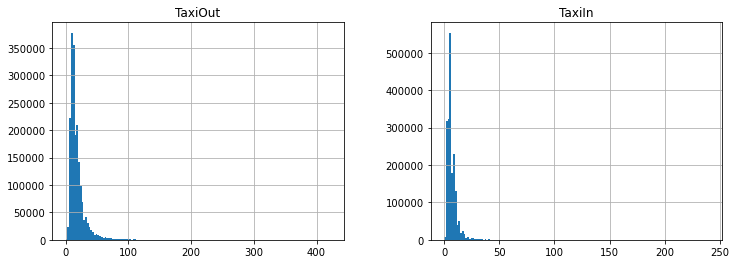

In [32]:
vuelos[['TaxiOut','TaxiIn']].hist(bins=150, figsize=(12,4))

Como se aprecia son distribuciones con asimetría positiva, donde la media no es representativa de la distribución y en este caso es mayor que la mediana. Para el análisis la vamos a descartar, aunque probablemente si entrasemos a analizar en profundidad la saturación de los aeropuertos o en que aeropuertos los aviones permanece más tiempo en tierra, serían variables que podrían aportar información.

In [33]:
# Elimino las variables TaxiIn y TaxiOut
vuelos.drop(['TaxiIn','TaxiOut'],inplace=True,axis=1)

La variable que voy a usar como indicador de retraso es _'ArrDelay'_ que indica el retraso a la llegada. De momento  voy a conservar para el análisis las variables _'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay' y 'LateAircraftDelay'._ 

Creo la variable 'Is_delayed' con los valores 'No' si no hay retraso, 'Yes' si tiene retraso y 'Canc/Div' si el vuelo fue cancelado o desviado.

In [34]:
# Variable categórica / esta retrasado?
vuelos['Is_delayed']='No'
vuelos.loc[(vuelos['ArrDelay']>0),'Is_delayed']='Yes'
vuelos.loc[vuelos['ArrDelay'].isna(),'Is_delayed']='Canc/Div'

**Variables relacionadas con el tiempo de vuelo.**

Voy a crear una columna con la velocidad de vuelo en millas por hora 'Speed_mph' y otra variable categórica 'Faster_than_estimated' que indique si el vuelo fue más rápido que lo estimado o no lo fue.

In [35]:
# Variable velocidad media
vuelos['Speed_mph']=round(((vuelos['Distance']/vuelos['AirTime'])*60),2)

In [36]:
vuelos.query('Speed_mph==inf')

,Year,Month,Day,DayOfWeek,Dep_Hour_of_the_day,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DayOfYear,Is_delayed,Speed_mph
53543,2008,1,5,6,11,OO,3705,N581SW,98.0,78.0,0.0,118.0,98.0,SGU,SLC,269,0,N,0,0.0,0.0,0.0,0.0,118.0,2008-01-05,5,Yes,inf
54342,2008,1,6,7,13,OO,3689,N581SW,93.0,56.0,0.0,104.0,67.0,TWF,SLC,175,0,N,0,0.0,104.0,0.0,0.0,0.0,2008-01-06,6,Yes,inf
245633,2008,2,12,2,16,OO,5854,N763SK,170.0,164.0,0.0,183.0,177.0,ASE,ORD,1013,0,N,0,0.0,0.0,183.0,0.0,0.0,2008-02-12,43,Yes,inf
414132,2008,3,31,1,15,XE,555,N14562,144.0,130.0,0.0,24.0,10.0,MSY,MCI,690,0,N,0,0.0,0.0,24.0,0.0,0.0,2008-03-31,91,Yes,inf
441835,2008,3,18,2,16,OO,5854,N765SK,153.0,164.0,0.0,97.0,108.0,ASE,ORD,1013,0,N,0,0.0,0.0,97.0,0.0,0.0,2008-03-18,78,Yes,inf
782761,2008,5,21,3,18,OO,5583,N568SW,54.0,52.0,0.0,12.0,10.0,LAX,SAN,109,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-05-21,142,Yes,inf
784702,2008,5,27,2,14,OO,5414,N271YV,28.0,45.0,0.0,-2.0,15.0,SAN,LAX,109,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-05-27,148,No,inf


La variable 'AirTime' en ocasiones toma un valor igual a cero, probablemente se deba a errores de transcripción o de imputación de los tiempos; esto provoca que haya velocidades que son físicamente imposibles. Teniendo en cuenta que un avion comercial vuela a una velocidad de entre 450 y 575 mph, voy a **imputar** los valores de velocidad superiores a 600 al valor de la mediana para eliminar estos errores.

In [37]:
mediana_velocidad=vuelos.query('Speed_mph<600').Speed_mph.median()
vuelos.loc[vuelos['Speed_mph']>600,'Speed_mph']=mediana_velocidad

In [38]:
# Variable categórica / más rápido de lo previsto?
vuelos['Faster_than_estimated']='No'
vuelos.loc[(vuelos['ActualElapsedTime']<vuelos['CRSElapsedTime']),'Faster_than_estimated']='Yes'
vuelos.loc[vuelos['ActualElapsedTime'].isna(),'Faster_than_estimated']='Canc/Div'

In [39]:
# Elimino variables
vuelos.drop(['ActualElapsedTime','CRSElapsedTime','AirTime'],axis=1, inplace=True)

In [40]:
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936756 entries, 0 to 1936757
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Year                   int64         
 1   Month                  int64         
 2   Day                    int64         
 3   DayOfWeek              int64         
 4   Dep_Hour_of_the_day    int32         
 5   UniqueCarrier          object        
 6   FlightNum              int64         
 7   TailNum                object        
 8   ArrDelay               float64       
 9   DepDelay               float64       
 10  Origin                 object        
 11  Dest                   object        
 12  Distance               int64         
 13  Cancelled              int64         
 14  CancellationCode       object        
 15  Diverted               int64         
 16  CarrierDelay           float64       
 17  WeatherDelay           float64       
 18  NASDelay              

**Variables relacionadas con el vuelo**

Voy a crear una nueva variable, la variable trayecto que me servirá para detectar que vuelos generan más retrasos.

In [41]:
vuelos['path']=vuelos['Origin'].str.cat(vuelos['Dest'],sep='-')

In [42]:
vuelos['path'].unique().shape

(5205,)

Existen 5.205 trayectos diferentes. Más adelante analizaremos cuales sufren mayor retraso.

## 2.5. Combinando dataframes

Además de este dataset tengo a mi disposición tres dataset más con datos sobre los aeropuertos, las compañías y los aviones.

Vamos a selecionar que información podría ser útil para responder a nuestras preguntas.

A continuación cargaré los csv correspondientes y los prepararé para unir con el dataset original. Utilizaré el comando merge y haré un "join" tipo "left", por que quiero que me mantenga todos los registros del dataset vuelos_c y me carge los registros coincidentes de la segunda tabla.

### 2.5.1. Aviones.

In [43]:
# Cargo la información de los aviones.
aviones=pd.read_csv('plane-data.csv')

In [44]:
aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [45]:
aviones.tail()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


Parece que hay un conjunto de aviones de los que no hay datos. He revisado alguna de estas matrículas y parace que no tienen el formato expedido por la ATA. Podría tratarse de aeronaves matriculadas en otro país, también podría tratarse de una matrícula antigua con un formato no reconocido o bien se puede deber a un error en la transcripción.   

De esta tabla voy a extraer el año de fabricación y el tipo de motor.

Por lo tanto eliminaré las filas sin información.

In [46]:
# Elimino Nan
aviones.dropna(inplace=True)

In [47]:
# Duplicados
aviones[aviones.duplicated()].count()

tailnum          0
type             0
manufacturer     0
issue_date       0
model            0
status           0
aircraft_type    0
engine_type      0
year             0
dtype: int64

In [48]:
# Tipos de motor.
aviones.engine_type.unique()

array(['Turbo-Fan', 'Turbo-Jet', 'Reciprocating', 'Turbo-Prop',
       'Turbo-Shaft', 'None', '4 Cycle'], dtype=object)

In [49]:
aviones[aviones.engine_type=='None']

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
1633,N401AA,Corporation,RAVEN,09/19/1977,S-50A,Valid,Balloon,None,None
1637,N402AA,Individual,RAVEN,05/26/1976,S55A,Valid,Balloon,None,1975
1649,N405AA,Individual,RAVEN,11/08/2006,S55A,Valid,Balloon,None,1975


Las aeronaves que no tienen motor son globos aerostáticos, por lo que lo voy adejar como está.

In [50]:
# Valores únicos de año de manufactura.
aviones.year.unique()

array(['2004', '1998', '1986', '1999', '2002', '1994', '2003', '2005',
       '2006', '2000', '2001', '1997', '1995', '1996', '1987', '1985',
       'None', '1988', '1968', '1990', '1991', '1969', '1970', '1992',
       '1993', '1965', '1989', '1959', '1980', '2008', '1983', '0000',
       '1984', '2007', '1967', '1975', '1979', '1957', '1974', '1978',
       '1963', '1956', '1972', '1962', '1973', '1982', '1976', '1964',
       '1977', '1946', '1966', '1971'], dtype=object)

El campo año de manufactura tiene dos valores fuera de lo esperado, 'None' y '0000'. Vamos a analizar estos datos y ver si puedo imputar algún valor a esta columna.

In [51]:
aviones.loc[(aviones['year']=='None'),:]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
138,N12528,Corporation,EMBRAER,05/31/2002,EMB-135LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
280,N14558,Corporation,EMBRAER,05/29/2002,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
342,N15555,Corporation,EMBRAER,06/07/2002,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
344,N15574,Corporation,EMBRAER,10/02/2002,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
481,N17358,Corporation,BOMBARDIER INC,12/29/2000,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
...,...,...,...,...,...,...,...,...,...
4882,N958UW,Corporation,EMBRAER,04/04/2008,ERJ 190-100 IGW,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
4887,N959UW,Corporation,EMBRAER,04/18/2008,ERJ 190-100 IGW,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
4982,N983AT,Corporation,BOEING,12/07/2005,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
4992,N986CA,Corporation,CANADAIR,02/04/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,None


In [52]:
aviones.loc[(aviones['year']=='0000'),:]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
725,N235SW,Corporation,EMBRAER,03/19/1996,EMB-120ER,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0000
962,N298AE,Corporation,SAAB-SCANIA,05/15/1998,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0000
1489,N384AE,Corporation,SAAB-SCANIA,10/29/1996,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,0000


Hay un total de 148 registros sin el año de fabricación. Voy a extraer el año en que se registró la aeronave _issue_date_ y asumo que será igual que el año de fabricación.

In [53]:
# Extraigo el año del campo Issue_date y lo asigno a year.
aviones.loc[(aviones['year']=='None')|(aviones['year']=='0000'),'year']=aviones['issue_date'].str.split('/',expand=True)[2]
aviones.loc[aviones['year']=='None',:]
aviones.iloc[[138,280,725,962,1489],:]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
172,N13161,Corporation,EMBRAER,04/29/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
314,N14937,Corporation,EMBRAER,02/23/1998,EMB-145EP,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
763,N245AY,Corporation,BOEING,04/24/2007,767-201,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987
1001,N306UA,Corporation,BOEING,02/19/1987,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987
1546,N398CA,Corporation,BOMBARDIER INC,08/22/2003,CL-600-2C10,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2003


In [54]:
aviones.year.unique()

array(['2004', '1998', '1986', '1999', '2002', '1994', '2003', '2005',
       '2006', '2000', '2001', '1997', '1995', '1996', '1987', '1985',
       '1988', '1968', '1990', '1991', '1969', '1970', '1992', '1993',
       '1965', '1989', '1959', '2008', '1980', '1983', '1984', '2007',
       '1967', '1975', '1979', '1957', '1974', '1978', '1963', '1956',
       '1972', '1977', '1962', '1973', '1982', '1976', '1964', '1946',
       '1966', '1971'], dtype=object)

Ahora que tengo todos los aviones con un año de fabricación solo tengo que cambiar el tipo a entero.

In [55]:
aviones['year']=aviones['year'].astype('int')
aviones['engine_type']=aviones['engine_type'].astype('category')

In [56]:
aviones['year'].describe()

count    4480.000000
mean     1997.061607
std         7.554151
min      1946.000000
25%      1992.000000
50%      1999.000000
75%      2002.000000
max      2008.000000
Name: year, dtype: float64

In [57]:

aviones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 34 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tailnum        4480 non-null   object  
 1   type           4480 non-null   object  
 2   manufacturer   4480 non-null   object  
 3   issue_date     4480 non-null   object  
 4   model          4480 non-null   object  
 5   status         4480 non-null   object  
 6   aircraft_type  4480 non-null   object  
 7   engine_type    4480 non-null   category
 8   year           4480 non-null   int32   
dtypes: category(1), int32(1), object(7)
memory usage: 462.2+ KB


In [58]:
vuelos_c=vuelos.merge(aviones[['engine_type','year']],how='left', left_on='TailNum',right_on=aviones['tailnum'])

### 2.5.2. Compañías.

In [59]:
# Carga de los datos de las compañías.
carriers=pd.read_csv('carriers.csv')

In [60]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [61]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [62]:
carriers[carriers['Code'].isna()]

,Code,Description
873,NaN,North American Airlines


In [63]:
carriers[carriers['Description']=='North American Airlines']

,Code,Description
873,NaN,North American Airlines


In [64]:
# Duplicados
carriers[carriers.duplicated()].sum()

Code           0.0
Description    0.0
dtype: float64

In [65]:
vuelos_c=vuelos_c.merge(carriers['Description'],how='left', left_on='UniqueCarrier',right_on=carriers['Code'])

### 2.5.3. Aeropuertos.

In [66]:
# Carga de la base de datos de aeropuertos.
airports=pd.read_csv('airports.csv')

In [67]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [68]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [69]:
airports.state.unique()

array(['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', nan, 'AS', 'CQ', 'GU',
       'HI', 'VI'], dtype=object)

57 corresponde a 50 estados + 1 distrito federal + 5 territorios + un Nan.

In [70]:
airports[airports['state'].isna()]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


In [71]:
airports[airports['state'].isna()].index

Int64Index([1136, 1715, 2251, 2312, 2752, 2759, 2794, 2795, 2900, 2964, 3001,
            3355],
           dtype='int64')

In [72]:
airports[airports['country']=='N Mariana Islands']

,iata,airport,city,state,country,lat,long
3001,SPN,Tinian International Airport,NaN,NaN,N Mariana Islands,14.996111,145.621384


In [73]:
airports[airports['state']=='MP']

,iata,airport,city,state,country,lat,long


In [74]:
# Diccionario con los datos que faltan y el índice

indices={1136:['Carlsbad','CA'],
        1715: ['Hilton Head Island','SC'],
        2251: ['Minot', 'ND'],
        2312: ['Marquette', 'MI'],
        2752: ['Ellsworth' , 'ND'],
        2759: ['Grand Forks', 'ND'],
        2794:['Thailand','Thailand'],
        2795: ['Palau', 'Palau'],
        2900: ['State college', 'PA'],
        2964: ['FairChild', 'WA'],
        3001:['Saipan', 'MP'],
        3355:['Yap','YAP']
        }

In [75]:
for i,v in indices.items():
    airports.loc[i,['city','state']]=v

In [76]:
airports.loc[1136,:]

iata                              CLD
airport    MC Clellan-Palomar Airport
city                         Carlsbad
state                              CA
country                           USA
lat                           33.1272
long                         -117.279
Name: 1136, dtype: object

In [77]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3376 non-null   object 
 3   state    3376 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


Una vez completados los valores nulos, uno los dataframes.

In [78]:
vuelos_c=vuelos_c.merge(airports[['city','state','country']],how='left', left_on='Origin',right_on=airports['iata'])

In [79]:
vuelos_c.isna().sum()

Year                          0
Month                         0
Day                           0
DayOfWeek                     0
Dep_Hour_of_the_day           0
UniqueCarrier                 0
FlightNum                     0
TailNum                       0
ArrDelay                   8387
DepDelay                      0
Origin                        0
Dest                          0
Distance                      0
Cancelled                     0
CancellationCode              0
Diverted                      0
CarrierDelay             689270
WeatherDelay             689270
NASDelay                 689270
SecurityDelay            689270
LateAircraftDelay        689270
Date                          0
DayOfYear                     0
Is_delayed                    0
Speed_mph                  8387
Faster_than_estimated         0
path                          0
engine_type              198385
year                     198385
Description                   0
city                          0
state   

Hay 198385 vuelos de los que no tengo datos sobre el avión.

Reorganizo de nuevo los campos.

In [80]:
columnas = list(vuelos_c.columns.values)
vuelos_c=vuelos_c.rename(columns={'Description':'CarrierName','year':'YearOfManufact',
                                  'city':'city_or','state':'state_or'})

Vuelvo a unir dataframes para extraer la información del destino.

In [81]:
vuelos_c=vuelos_c.merge(airports[['city','state']],how='left', left_on='Dest',right_on=airports['iata'])
vuelos_c=vuelos_c.rename(columns={'city':'city_dest','state':'state_dest'})

In [82]:
columnas =[ 'Date','DayOfYear','Year','Month','Day','DayOfWeek','Dep_Hour_of_the_day',
 'Is_delayed','ArrDelay','DepDelay', 
 'UniqueCarrier','CarrierName','TailNum','engine_type','YearOfManufact',
 'Faster_than_estimated','Speed_mph',
 'Origin','Dest','FlightNum','Distance','path','city_or','state_or','country','city_dest','state_dest',
 'Cancelled','CancellationCode','Diverted',
 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
vuelos_c=vuelos_c[columnas]

### Sobre el uso de memoria.

Voy a intentar rebajar el uso de la memoria forzando los tipos de las variables.

In [83]:
vuelos_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936756 entries, 0 to 1936755
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   DayOfYear              int32         
 2   Year                   int64         
 3   Month                  int64         
 4   Day                    int64         
 5   DayOfWeek              int64         
 6   Dep_Hour_of_the_day    int32         
 7   Is_delayed             object        
 8   ArrDelay               float64       
 9   DepDelay               float64       
 10  UniqueCarrier          object        
 11  CarrierName            object        
 12  TailNum                object        
 13  engine_type            category      
 14  YearOfManufact         float64       
 15  Faster_than_estimated  object        
 16  Speed_mph              float64       
 17  Origin                 object        
 18  Dest                  

In [84]:
vuelos_c.astype({'Year':'int32',
               'Month':'uint8',
               'Day':'uint8',
               'DayOfWeek':'uint8',
               'Dep_Hour_of_the_day':'uint8',
               'Diverted':'uint8',
               'Cancelled':'uint8',
               'UniqueCarrier':'category',
               'TailNum':'category',
               'Origin':'category',
               'Dest':'category',
               'CancellationCode':'category',
               'Is_delayed':'category',
               'Faster_than_estimated':'category',
               'DayOfYear':'int32',
               'state_or':'category',
                'country':'category',
                'state_dest':'category'}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936756 entries, 0 to 1936755
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   DayOfYear              int32         
 2   Year                   int32         
 3   Month                  uint8         
 4   Day                    uint8         
 5   DayOfWeek              uint8         
 6   Dep_Hour_of_the_day    uint8         
 7   Is_delayed             category      
 8   ArrDelay               float64       
 9   DepDelay               float64       
 10  UniqueCarrier          category      
 11  CarrierName            object        
 12  TailNum                category      
 13  engine_type            category      
 14  YearOfManufact         float64       
 15  Faster_than_estimated  category      
 16  Speed_mph              float64       
 17  Origin                 category      
 18  Dest                  

Una vez preparado el dataframe, han quedado 8387 valores Nan en las variables ArrDelay y Speed_mph que corresponden a vuelos que fueron cancelados o desviados. De momento no imputo ningún valor.

Otros 689270 valores Nan los encontramos en el conjunto de datos referidos al retraso imputado a cada causa. 

In [85]:
vuelos_c.to_csv('vuelos_c.csv')

In [86]:
# Preparo una copia para entrar en el análisis exploratorio.
df=vuelos_c.copy()

# 3. Análisis exploratorio de los datos. 

Voy a hacer un primer análisis utilizando la función describe.

In [87]:
df.describe()

,DayOfYear,Year,Month,Day,DayOfWeek,Dep_Hour_of_the_day,ArrDelay,DepDelay,YearOfManufact,Speed_mph,FlightNum,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936756e+06,1936756.0,1.936756e+06,1.936756e+06,1.936756e+06,1.936756e+06,1.928369e+06,1.936756e+06,1.738371e+06,1.928369e+06,1.936756e+06,1.936756e+06,1.936756e+06,1.936756e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,1.712009e+02,2008.0,6.111111e+00,1.575346e+01,3.984827e+00,1.439864e+01,4.219988e+01,4.318517e+01,1.997542e+03,3.966544e+02,2.184265e+03,7.656863e+02,3.268352e-04,4.003602e-03,1.917939e+01,3.703577e+00,1.502162e+01,9.013728e-02,2.529651e+01
std,1.070209e+02,0.0,3.482546e+00,8.776268e+00,1.995967e+00,4.244424e+00,5.678474e+01,5.340253e+01,7.221218e+00,7.567961e+01,1.944703e+03,5.744799e+02,1.807563e-02,6.314725e-02,4.354623e+01,2.149292e+01,3.383307e+01,2.022716e+00,4.205488e+01
min,1.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.956000e+03,2.129000e+01,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.800000e+01,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.100000e+01,9.000000e+00,1.200000e+01,1.993000e+03,3.518600e+02,6.100000e+02,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.660000e+02,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.500000e+01,2.400000e+01,2.400000e+01,1.999000e+03,4.037600e+02,1.543000e+03,6.060000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2.530000e+02,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.800000e+01,5.600000e+01,5.300000e+01,2.003000e+03,4.480600e+02,3.422000e+03,9.980000e+02,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,3.660000e+02,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,2.461000e+03,2.467000e+03,2.008000e+03,6.000000e+02,9.742000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


El output de la función describe contiene mucha información sobre la distribución de nuestras variables pero a primera vista es incómodo de leer e interpretar, y en general es más intuitivo ver una representación visual.

Para entender como se comportan nuestras variables vamos a ir analizándolas más detalladamente.

## 3.1. Tendencias temporales

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'DayOfYear'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Dep_Hour_of_the_day'}>,
        <AxesSubplot:>]], dtype=object)

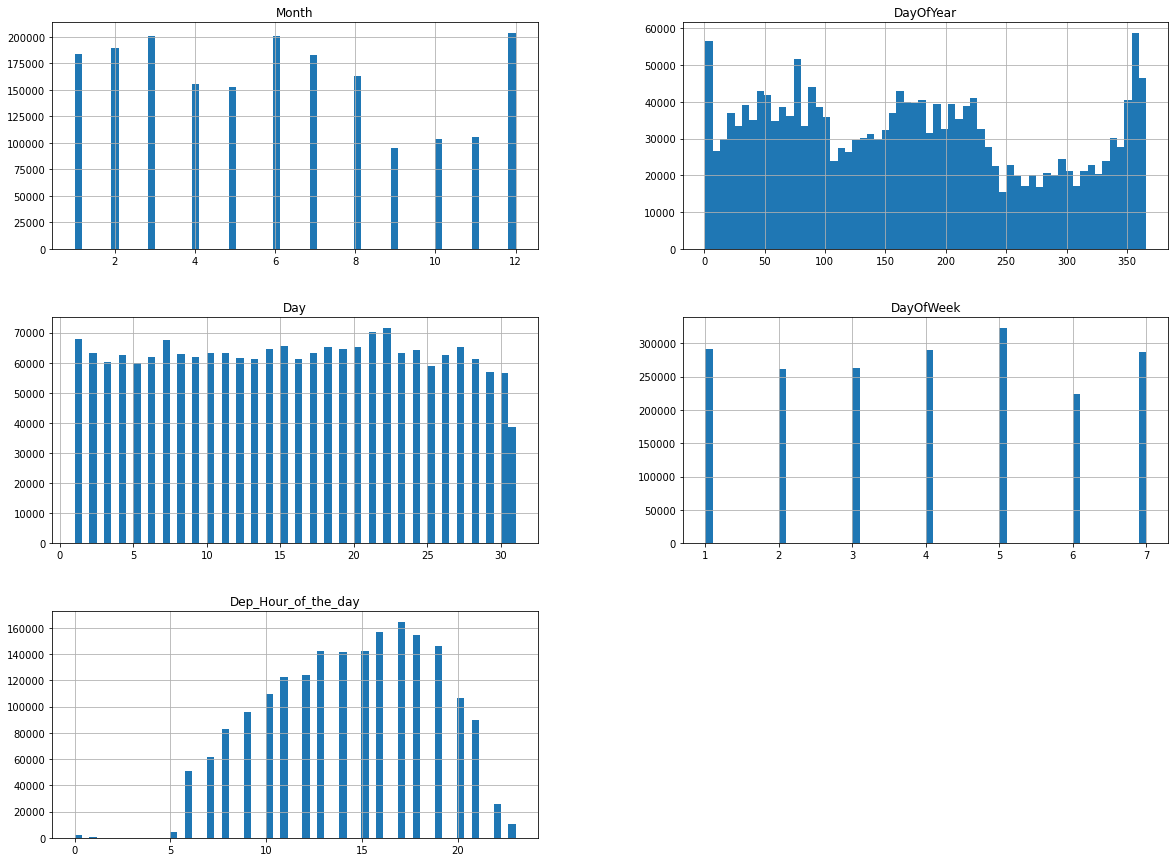

In [88]:
df[['Month','DayOfYear','Day','DayOfWeek','Dep_Hour_of_the_day']].hist(bins=60, figsize=(20,15))

Parece que se observa una mayor tendencia a volar en el primer y el tercer tremestre. Los meses con mayor frecuencia de vuelo son marzo, junio y diciembre. Estos picos se podrían explicar por periodos vacacionales, la pascua de 2008 que cayó en marzo, las vacaciones de verano y navidad. Si nos vamos al gráfico de días del año, esto tiene correspondencia, siendo los periodos más significativos los primeros días del año y los últimos.

Por otro lado, no parece observarse una tendencia en como se distribuyen los vuelos en los días del mes. Aunque si lo analizamos como día de la semana, los viernes y los lunes son los días con mayores vuelos y el sábado el día que menos se vuela. 

En cuanto a la distribución horaria, apenas tenemos vuelos nocturnos y el 75% de los vuelos están concentrados entre las 11 y las 23 h, tiendo el máximo de frecuencia entre las 15 y las 18.

<AxesSubplot:>

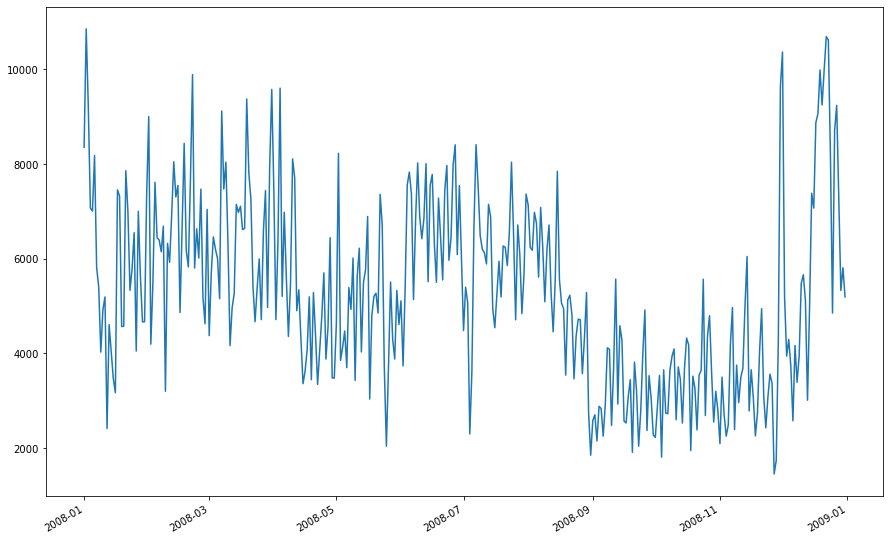

In [89]:
# Serie temporal con el volumen de vuelos.
df['Date'].value_counts().plot(figsize=(15,10))

## 3.2. Como se comportan los retrasos.

Vamos a analizar ahora como se comportan los retrasos. Para ello primero voy a utilizar la función describe. Para no tener problemas con los Nan a la hora de analizar esta variable, voy a filtrar los vuelos que no fueron cancelados ni desviados.

In [90]:
# Separo el Dataframe en dos, en función de si el vuelo se completo o no.
df_finalizados=df.query('Cancelled==0 and Diverted==0')
df_no_finalizados=df.query('Cancelled==1 and Diverted==1')

# Valores estadísticos para los retrasos en los vuelos completados.
df_finalizados[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,1.928369e+06,1.928369e+06
mean,4.309169e+01,4.219988e+01
std,5.326603e+01,5.678474e+01
min,6.000000e+00,-1.090000e+02
25%,1.200000e+01,9.000000e+00
50%,2.400000e+01,2.400000e+01
75%,5.300000e+01,5.600000e+01
max,2.467000e+03,2.461000e+03


In [91]:
# Asimetría de las distribuciones.
df_finalizados[['DepDelay','ArrDelay']].skew()

DepDelay    4.500577
ArrDelay    3.948778
dtype: float64

array([[<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

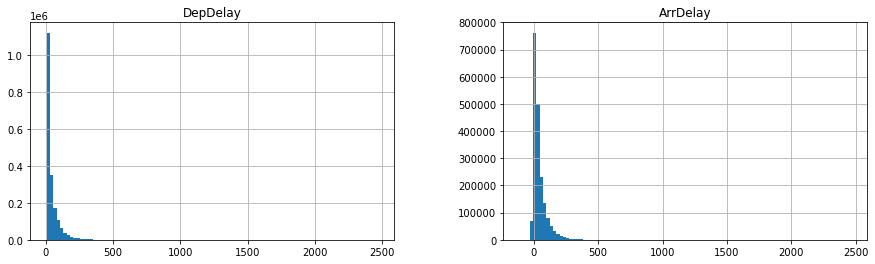

In [92]:
# Histograma de las distribuciones de retrasos.
df_finalizados[['DepDelay','ArrDelay']].hist(bins=100,figsize=(15,4))

Los retrasos tanto a la salida como a la llegada se comportan de igual manera. Sus distribuciones tienen una simetría positiva y la mayoría de los valores se concentran en torno a la mediana (distribución leptucúrtica). Esto quiere decir que el pico de la distribución esta desplazado hacia la izquierda. 

La mediana de ambas distribuciones está en los 24 minutos de retraso, pero el valor máximo es de alrededor de 2640 minutos que son alrededor de unas 40 horas. El mínimo retraso a la llegada registrado es de -109 minutos.

A continuación vamos a analizar estos valores extremos.

In [93]:
df_finalizados.query('ArrDelay<0')[['Dep_Hour_of_the_day','ArrDelay','DepDelay','Speed_mph']].describe()

,Dep_Hour_of_the_day,ArrDelay,DepDelay,Speed_mph
count,177916.000000,177916.000000,177916.000000,177916.000000
mean,13.981598,-6.897261,10.313367,440.672756
std,4.284022,6.102346,4.912782,66.565568
min,0.000000,-109.000000,6.000000,122.500000
25%,11.000000,-9.000000,7.000000,404.290000
50%,14.000000,-5.000000,9.000000,445.465000
75%,17.000000,-2.000000,12.000000,484.392500
max,23.000000,-1.000000,96.000000,600.000000


### ¿Que porcentaje de vuelos tuvieron retraso en 2008?

In [94]:
# Numero de vuelos retrasados
df['Is_delayed'].value_counts()

Yes         1723413
No           204956
Canc/Div       8387
Name: Is_delayed, dtype: int64

In [95]:
df['Is_delayed'].value_counts(normalize=True)

Yes         0.889845
No          0.105824
Canc/Div    0.004330
Name: Is_delayed, dtype: float64

In [96]:
df['Faster_than_estimated'].value_counts()

Yes         1173739
No           754630
Canc/Div       8387
Name: Faster_than_estimated, dtype: int64

In [97]:
df['Faster_than_estimated'].value_counts(normalize=True)

Yes         0.606033
No          0.389636
Canc/Div    0.004330
Name: Faster_than_estimated, dtype: float64

In [98]:
# Vuelos que no sufrieron retraso a la llegada, que fueron más rápidos de lo previsto y que despegaron con retraso. 
df[(df['Faster_than_estimated']=='Yes')&(df['Is_delayed']=='No')&(df['DepDelay']>0)].shape[0]

204956

Cerca del 89% de los vuelos tuvieron retraso en 2008, a pesar de que el 60% de los vuelos son más rápidos de lo estimado. Todos los vuelos que llegaron sin retraso a su destino salieron tarde pero volaron más rápido de lo previsto.

**Retraso en función del mes**

Calculamos el retraso (recordemos que para nuestro caso la media no es representativa y voy a usar la mediana como valor representativo de la distribución) en función del més y lo comparo con el número de vuelos en el mismo periodo de tiempo.

In [99]:
df_finalizados[df_finalizados['Is_delayed']=='Yes'].groupby('Month').agg({'ArrDelay' : 'median','FlightNum':'count'})

,ArrDelay,FlightNum
Month,,
1,30.0,163801
2,32.0,171309
3,29.0,179833
4,27.0,137941
5,26.0,135421
6,32.0,182955
7,30.0,164534
8,28.0,143013
9,24.0,82817


In [100]:
# Total de vuelos por mes
TF_Month=df.groupby('Month')[['FlightNum']].count()

# Retrasos por mes
data_month=df[df['Is_delayed']=='Yes'].groupby('Month').agg({'Is_delayed':'count','ArrDelay':'median'})

# Retrasos con más de 30 minutos
data_month_vd=df[(df['Is_delayed']=='Yes') & (df['ArrDelay']>25)].groupby('Month').agg({'Is_delayed':'count','ArrDelay':'median'})
data_month_vd

# df Concatenado
TF_Month=pd.concat([TF_Month,data_month,data_month_vd],axis=1)
TF_Month.columns=['FlightNum','Is_delayed','ArrDealy','Big_delay','Arr_Big_delay']

# Porcentaje de vuelos con retraso por día de la semana
TF_Month['Is_delayed_pct']=TF_Month['Is_delayed']/TF_Month['FlightNum']*100
TF_Month['Big_delay_pct']=TF_Month['Big_delay']/TF_Month['FlightNum']*100
TF_Month

,FlightNum,Is_delayed,ArrDealy,Big_delay,Arr_Big_delay,Is_delayed_pct,Big_delay_pct
Month,,,,,,,
1,183527,163801,30.0,91122,57.0,89.251718,49.650460
2,189532,171309,32.0,99105,58.0,90.385265,52.289323
3,200842,179833,29.0,97913,56.0,89.539539,48.751257
4,155264,137941,27.0,71447,54.0,88.842874,46.016462
5,153072,135421,26.0,68818,54.0,88.468825,44.957928
6,200914,182955,32.0,105505,60.0,91.061350,52.512518
7,182945,164534,30.0,91459,60.0,89.936320,49.992621
8,162648,143013,28.0,75540,58.0,87.927918,46.443854
9,95539,82817,24.0,40295,54.0,86.683972,42.176493


Los meses con menor porcentaje de vuelos retrasados son septiembre, octubre y noviembre con entre 85 y 86,5 % de vuelos con retraso, mientras que los meses con mayor porcentaje de retrasos son febrero, junio y diciembre.

Si entendemos que un retraso de más de 25 minutos sería un retraso de __larga espera__, en este caso los meses con mayor incidencia son febrero, junio, julio y diciembre con un porcentaje de retrasos de larga espera entre 49,5 y 54,5 % de los vuelos.

**Retraso en función del dia de la semana**

In [101]:
df_finalizados[df_finalizados['Is_delayed']=='Yes'].groupby('DayOfWeek').agg({'ArrDelay' : 'median','FlightNum':'count'})

,ArrDelay,FlightNum
DayOfWeek,,
1,29.0,258998
2,30.0,232407
3,28.0,233500
4,28.0,258788
5,30.0,291280
6,27.0,193890
7,30.0,254550


In [102]:
# Porcentaje de los vuelos que se retrasan por día de la semana.
TF_DayOfWeek=df.groupby('DayOfWeek')[['FlightNum']].count()

# Retrasos por dia dela semana
data_DoW=df[df['Is_delayed']=='Yes'].groupby('DayOfWeek').agg({'Is_delayed':'count','ArrDelay':'median'})

# Retrasos con más de 30 minutos
data_DoW_vd=df[(df['Is_delayed']=='Yes') & (df['ArrDelay']>25)].groupby('DayOfWeek').agg({'Is_delayed':'count','ArrDelay':'median'})
data_DoW_vd

# df Concatenado
TF_DayOfWeek=pd.concat([TF_DayOfWeek,data_DoW,data_DoW_vd],axis=1)
TF_DayOfWeek.columns=['FlightNum','Is_delayed','ArrDealy','Big_delay','Arr_Big_delay']

# Porcentaje de vuelos con retraso por día de la semana
TF_DayOfWeek['Is_delayed_pct']=TF_DayOfWeek['Is_delayed']/TF_DayOfWeek['FlightNum']*100
TF_DayOfWeek['Big_delay_pct']=TF_DayOfWeek['Big_delay']/TF_DayOfWeek['FlightNum']*100
TF_DayOfWeek

,FlightNum,Is_delayed,ArrDealy,Big_delay,Arr_Big_delay,Is_delayed_pct,Big_delay_pct
DayOfWeek,,,,,,,
1,290933,258998,29.0,140422,57.0,89.023246,48.266096
2,260943,232407,30.0,129190,58.0,89.064278,49.508897
3,262805,233500,28.0,125175,55.0,88.849147,47.630372
4,289449,258788,28.0,138984,56.0,89.407115,48.016749
5,323259,291280,30.0,162926,58.0,90.107313,50.401072
6,223256,193890,27.0,101482,56.0,86.846490,45.455441
7,286111,254550,30.0,140721,60.0,88.968967,49.184058


**Retraso en función del dia del año**

Esta tabla agrupada tiene unas 366 líneas, analizar esta tabla es un poco complicado, sin embargo representando los retrasos frente al número de vuelos en un grafico de dispersión se puede inferir una conclusión muy rápida. 

In [103]:
data=df_finalizados[df_finalizados['Is_delayed']=='Yes'].groupby(['DayOfYear','Date']).agg({'DepDelay':'median','ArrDelay' : 'median','FlightNum':'count'})
data.sort_values(by='ArrDelay', ascending=False)

,,DepDelay,ArrDelay,FlightNum
DayOfYear,Date,,,
335,2008-11-30,48.0,58.0,9047
195,2008-07-13,47.0,52.0,6667
43,2008-02-12,39.0,50.0,6483
356,2008-12-21,44.0,48.0,9366
319,2008-11-14,42.0,48.0,5575
...,...,...,...,...
244,2008-08-31,23.0,18.0,1440
294,2008-10-20,20.0,18.0,2738
264,2008-09-20,21.0,18.0,1522


In [104]:
# Porcentaje de los vuelos que se retrasan por día de la semana.
TF_DayOfYear=df.groupby(['DayOfYear','Date'])[['FlightNum']].count()

# Retrasos por dia dela semana
data_DoY=df[df['Is_delayed']=='Yes'].groupby(['DayOfYear','Date']).agg({'Is_delayed':'count','ArrDelay':'median'})

# Retrasos con más de 30 minutos
data_DoY_vd=df[(df['Is_delayed']=='Yes') & (df['ArrDelay']>25)].groupby(['DayOfYear','Date']).agg({'Is_delayed':'count','ArrDelay':'median'})
data_DoY_vd

# df Concatenado
TF_DayOfYear=pd.concat([TF_DayOfYear,data_DoY,data_DoY_vd],axis=1)
TF_DayOfYear.columns=['FlightNum','Is_delayed','ArrDealy','Big_delay','Arr_Big_delay']

# Porcentaje de vuelos con retraso por día de la semana
TF_DayOfYear['Is_delayed_pct']=TF_DayOfYear['Is_delayed']/TF_DayOfYear['FlightNum']*100
TF_DayOfYear['Big_delay_pct']=TF_DayOfYear['Big_delay']/TF_DayOfYear['FlightNum']*100

pd.set_option('display.max_rows', 366)
TF_DayOfYear

,,FlightNum,Is_delayed,ArrDealy,Big_delay,Arr_Big_delay,Is_delayed_pct,Big_delay_pct
DayOfYear,Date,,,,,,,
1,2008-01-01,8354,7584,32.0,4413,59.0,90.782859,52.824994
2,2008-01-02,10857,9975,32.0,5859,53.0,91.876209,53.965184
3,2008-01-03,9225,8187,25.0,4089,50.0,88.747967,44.325203
4,2008-01-04,7071,6256,27.0,3266,55.0,88.474049,46.188658
5,2008-01-05,7005,6316,34.0,3747,60.0,90.164168,53.490364
6,2008-01-06,8179,7309,30.0,4081,56.0,89.363003,49.896075
7,2008-01-07,5814,5162,30.0,2819,63.0,88.785690,48.486412
8,2008-01-08,5406,4914,31.0,2738,61.0,90.899001,50.647429
9,2008-01-09,4026,3471,24.0,1620,50.0,86.214605,40.238450


**Relación entre retraso a la salida y retraso a la llegada**

Representamos en un gráfico de dispersión. Las variables Retraso a la llegada y retraso a la salida.

<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

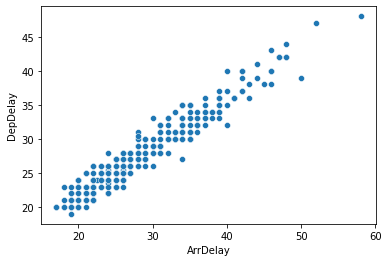

In [105]:
sns.scatterplot(data=data,x='ArrDelay',y='DepDelay')

A continuación veremos las variables Retraso a la llegada y número de vuelos.

<AxesSubplot:xlabel='ArrDelay', ylabel='FlightNum'>

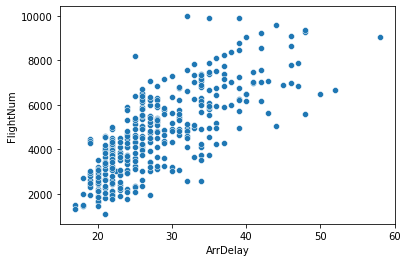

In [106]:
sns.scatterplot(data=data,x='ArrDelay',y='FlightNum')

Parece que hay una tendencia a haber mayor retraso los días que hay mayor número de vuelos. Además observando el primer gráfico, mayor retraso en la llegada cuando hay mayor retraso en la salida.

## 3.3. Retrasos por compañías.

Queremos conocer ahora que compañías acumulan más retrasos, cuales tienen retrasos mayores y si esto es función de la flota.

In [107]:
df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [108]:
# Retraso promedio (mediana), retraso acumulado y número de vuelos en función de la compañía. 
df.groupby(['UniqueCarrier','CarrierName'])['ArrDelay'].agg([('Retraso (mediana)','median'),('Retraso acumulado (suma)','sum'),('total de vuelos','count')]).sort_values(by='Retraso (mediana)', ascending=[False])

,,Retraso (mediana),Retraso acumulado (suma),total de vuelos
UniqueCarrier,CarrierName,,,
YV,Mesa Airlines Inc.,34.0,3691461.0,66769
B6,JetBlue Airways,33.0,3025749.0,54925
OH,Comair Inc.,33.0,2675993.0,52453
XE,Expressjet Airlines Inc.,30.0,5176042.0,103147
AA,American Airlines Inc.,29.0,8889066.0,190910
UA,United Air Lines Inc.,29.0,6733013.0,140904
MQ,American Eagle Airlines Inc.,28.0,6396704.0,141223
9E,Pinnacle Airlines Inc.,28.0,2420468.0,51569
EV,Atlantic Southeast Airlines,28.0,3888131.0,81762


En esta tabla se presentan el total de minutos de retraso acumulado, el número de vuelos y la mediana de retraso que tiene cada compañía ordenados de mayor mediana de retraso a menor.

Como se aprecia las tres primeras compañías, Mesa, JetBlue y Comair, tienen una mediana de retraso en torno a los 33 minutos y hacen entre 50.000 y 66.00 vuelos al año. 

United Airlines y American Airlines se sitúan con un retraso de 29 minutos pero con el triple de vuelos.

Por último, Southwest Airlines con 376.000 vuelos anuales solo tiene 17 minutos de mediana de retraso.


In [109]:
#companys=df.UniqueCarrier.unique()

In [110]:
# Cálculo de la edad media de la flota
#B6=pd.DataFrame(df[df.UniqueCarrier=='B6']['TailNum'].unique())
#B6.merge(aviones['year'], how='left',left_on=0,right_on=aviones['tailnum']).mean()

In [111]:
# Año de fabricación promedio de todos los vuelos, retraso medio y distancia media por compañía.
delay_carrier=df.groupby(['UniqueCarrier','CarrierName']).agg({'YearOfManufact':['mean'],'ArrDelay':'median','Distance':'median','Speed_mph':'median','FlightNum':'count'}).sort_values(by=('Distance','median'), ascending=[False])
delay_carrier


,,YearOfManufact,ArrDelay,Distance,Speed_mph,FlightNum
,,mean,median,median,median,count
UniqueCarrier,CarrierName,,,,,
CO,Continental Air Lines Inc.,1997.704429,21.0,1091,441.690,100195
AA,American Airlines Inc.,1986.537881,29.0,1045,441.360,191865
B6,JetBlue Airways,2004.636049,33.0,1035,430.590,55315
AS,Alaska Airlines Inc.,1999.002419,22.0,873,425.905,39293
F9,Frontier Airlines Inc.,2003.867053,17.0,862,435.180,28267
UA,United Air Lines Inc.,1994.217707,29.0,853,435.450,141426
DL,Delta Air Lines Inc.,1992.372233,23.0,732,420.000,114238
US,US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.),1995.863922,21.0,678,413.200,98425


Si agrupamos los promedios de distancia de vuelo, fecha y retraso por compañía no se observa un patron claro entre el retraso y otras variables. Probablemente hay algún factor más que influye en el retraso.

In [112]:
#Añadir gráfico

### 3.3.1. Retrasos vs antigüedad del avión

Quiero ver ahora si hay una relación entre el año del avión y el retraso medio.

In [113]:
delay_yoM=df.groupby(['YearOfManufact']).agg({'ArrDelay':'median','Distance':'median','Speed_mph':'median','FlightNum':'count'}).sort_values(by=('ArrDelay'), ascending=False)
delay_yoM

,ArrDelay,Distance,Speed_mph,FlightNum
YearOfManufact,,,,
1970.0,34.0,491,373.475,452
1966.0,33.5,425,350.135,363
1956.0,33.0,2486,483.680,89
1963.0,32.0,888,437.450,518
1973.0,32.0,631,400.000,825
1974.0,31.0,936,439.460,476
1965.0,31.0,745,411.140,319
1971.0,31.0,449,375.850,305
1959.0,30.0,1172,442.005,717


Parece que hay una cierta tendencia a que aviones más antiguos acumulen más retrasos pero no es muy clara.

<AxesSubplot:xlabel='YearOfManufact', ylabel='ArrDelay'>

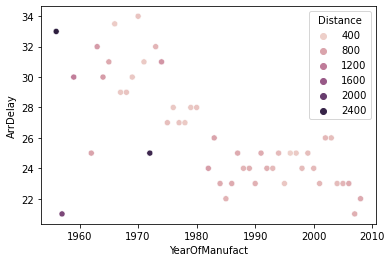

In [114]:
# Añadir gráfico

sns.scatterplot(data=delay_yoM,y='ArrDelay',x='YearOfManufact',hue='Distance')

## 3.4. Origenes y destinos.

Arranco esta sección haciendome una preguna: ¿influye en el retraso el origen y el destino de mi viaje? Podría tener cierta lógica que aeropuertos con más tráfico acumulen más retrasos, vamos a ver lo que nos dicen los datos.


### 3.4.1. Aeropuertos y trayectos más frecuentes.

In [115]:
# Top.15 Aeropuertos con mayor número de salidas
df.groupby(['Origin','city_or','state_or']).agg({'FlightNum':'count','ArrDelay':'median'}).sort_values(by='FlightNum',ascending=False)[0:14]

,,,FlightNum,ArrDelay
Origin,city_or,state_or,,
ATL,Atlanta,GA,131613,25.0
ORD,Chicago,IL,125979,33.0
DFW,Dallas-Fort Worth,TX,95414,24.0
DEN,Denver,CO,74322,22.0
LAX,Los Angeles,CA,58772,19.0
IAH,Houston,TX,56847,20.0
PHX,Phoenix,AZ,55720,18.0
LAS,Las Vegas,NV,53709,18.0
EWR,Newark,NJ,52925,31.0


In [116]:
# Top.15 Aeropuertos con mayor número de llegadas
df.groupby(['Dest','city_dest','state_dest']).agg({'FlightNum':'count','ArrDelay':'median'}).sort_values(by='FlightNum',ascending=False)[0:14]

,,,FlightNum,ArrDelay
Dest,city_dest,state_dest,,
ORD,Chicago,IL,108984,39.0
ATL,Atlanta,GA,106898,27.0
DFW,Dallas-Fort Worth,TX,70657,25.0
DEN,Denver,CO,63002,21.0
LAX,Los Angeles,CA,59969,21.0
EWR,Newark,NJ,55861,40.0
LAS,Las Vegas,NV,48857,21.0
PHX,Phoenix,AZ,47836,19.0
SFO,San Francisco,CA,46876,34.0


In [117]:
# Top.15 Trayectos con mayor número viajes
df.groupby(['path','city_or','city_dest']).agg({'FlightNum':'count','ArrDelay':'median'}).sort_values(by='FlightNum',ascending=False)[0:14]

,,,FlightNum,ArrDelay
path,city_or,city_dest,,
LAX-SFO,Los Angeles,San Francisco,4739,32.0
ORD-LGA,Chicago,New York,4396,40.0
ATL-LGA,Atlanta,New York,4058,30.0
SFO-LAX,San Francisco,Los Angeles,4020,30.0
LAS-LAX,Las Vegas,Los Angeles,3516,21.0
LGA-ATL,New York,Atlanta,3354,29.0
ORD-EWR,Chicago,Newark,3347,48.5
LGA-ORD,New York,Chicago,3327,47.0
ATL-EWR,Atlanta,Newark,3283,40.0


In [118]:
# Estados de origen, número de vuelos y retraso.
df.groupby(['state_or']).agg({'FlightNum':'count','ArrDelay':'median'}).sort_values(by='FlightNum',ascending=False)[0:14]

,FlightNum,ArrDelay
state_or,,
TX,230464,21.0
CA,218466,20.0
IL,160746,30.0
GA,136946,25.0
FL,130608,25.0
NY,89424,33.0
CO,83231,23.0
AZ,62169,18.0
NV,60047,18.0


In [119]:
# Estados de destino, número de vuelos y retraso
df.groupby(['state_dest']).agg({'FlightNum':'count','ArrDelay':'median'}).sort_values(by='FlightNum',ascending=False)[0:14]

,FlightNum,ArrDelay
state_dest,,
CA,234695,22.0
TX,202292,22.0
IL,141366,33.0
FL,136215,23.0
GA,113213,27.0
NY,102878,32.0
CO,73052,22.0
VA,57210,25.0
NV,56327,21.0


Los cinco estados con mayor tráfico aéreo son California, Texas, Ilinois, Florida y Georgia. El retraso promedio en estos estados está entre 20 y 25 minutos, salvo en el caso de Ilinois que se dispara hasta los 30 minutos.

In [120]:
# Aerpuertos de origen y retraso.
origen=df.groupby(['Origin','city_or','state_or']).agg({'ArrDelay':'median','FlightNum':'count'}).sort_values(by='ArrDelay',ascending=False)

origen.query('FlightNum>1000')

,,,ArrDelay,FlightNum
Origin,city_or,state_or,,
ACV,Arcata/Eureka,CA,45.0,1134
BTV,Burlington,VT,43.0,1725
FSD,Sioux Falls,SD,43.0,1271
PIA,Peoria,IL,41.0,1173
FWA,Fort Wayne,IN,41.0,1464
GRB,Green Bay,WI,39.0,1817
PWM,Portland,ME,38.0,1789
SGF,Springfield,MO,37.0,2386
MYR,Myrtle Beach,SC,37.0,1030


In [121]:
# Añadir gráfico

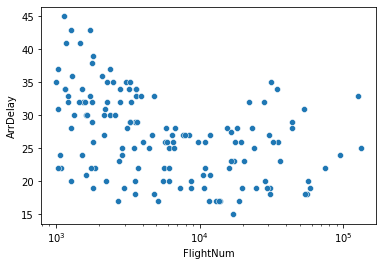

In [122]:
sns.scatterplot(data=origen.query('FlightNum>1000'),y='ArrDelay',x='FlightNum')
plt.xscale('log')
plt.show()

In [123]:
# Aeropuertos de destino y retrasos.
destino=df.groupby(['Dest','city_dest','state_dest']).agg({'ArrDelay':'median','FlightNum':'count'}).sort_values(by='ArrDelay',ascending=False)
destino.query('FlightNum>1000')

,,,ArrDelay,FlightNum
Dest,city_dest,state_dest,,
EWR,Newark,NJ,40.0,55861
ORD,Chicago,IL,39.0,108984
LGA,New York,NY,37.0,38137
JFK,New York,NY,36.0,35506
SFO,San Francisco,CA,34.0,46876
CMI,Champaign/Urbana,IL,34.0,1022
AVL,Asheville,NC,33.0,1174
PFN,Panama City,FL,33.0,1048
CAE,Columbia,SC,32.0,3392


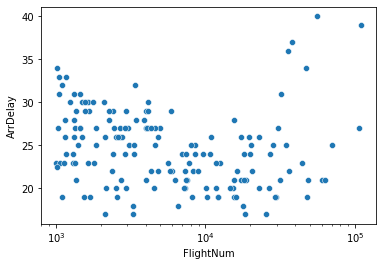

In [124]:
sns.scatterplot(data=destino.query('FlightNum>1000'),y='ArrDelay',x='FlightNum')
plt.xscale('log')
plt.show()

Para aeropuertos con menos de 20.000 vuelos al año (55 vuelos diarios) no se observan tendencia claras entre el retraso y el tráfico. Para aeropuertos con más tráfico parece que hay una ligera tendencia a que cuando volamos hacia aeropuertos con más tráfico el retraso promedio es mayor. Sin embargo no se observa esa tendencia tan claramente si observamos los aeropuertos de origen.

In [125]:
# Rutas y retrasos
rutas=df.groupby(['path','city_or','city_dest']).agg({'ArrDelay':['median','count']}).sort_values(by=('ArrDelay','count'),ascending=False)
rutas.head(50)

ArrDelay      
                                              median count
path    city_or           city_dest                       
LAX-SFO Los Angeles       San Francisco         32.0  4734
ORD-LGA Chicago           New York              40.0  4355
ATL-LGA Atlanta           New York              30.0  4025
SFO-LAX San Francisco     Los Angeles           30.0  4015
LAS-LAX Las Vegas         Los Angeles           21.0  3512
LGA-ATL New York          Atlanta               29.0  3343
ORD-EWR Chicago           Newark                48.5  3338
LGA-ORD New York          Chicago               47.0  3301
ATL-EWR Atlanta           Newark                40.0  3271
DFW-ORD Dallas-Fort Worth Chicago               35.0  3260
HOU-DAL Houston           Dallas                21.0  3165
ATL-MCO Atlanta           Orlando               21.0  3146
PHX-LAS Phoenix           Las Vegas             22.0  3139
DAL-HOU Dallas            Houston               20.0  3081
ATL-DFW Atlanta           Dallas-Fort Worth     23.0  3074
DEN-LAX Denver            Los Angeles           21.0  2989
PHX-LAX Phoenix           Los Angeles           19.0  2972
ORD-DFW Chicago           Dallas-Fort Worth     32.0  2949
LAX-LAS Los Angeles       Las Vegas             21.0  2945
ORD-LAX Chicago           Los Angeles           28.0  2937
ORD-MSP Chicago           Minneapolis           31.0  2909
DFW-ATL Dallas-Fort Worth Atlanta               24.0  2824
EWR-ATL Newark            Atlanta               39.0  2762
DEN-LAS Denver            Las Vegas             23.0  2754
LAX-DEN Los Angeles       Denver                19.0  2732
LAX-ORD Los Angeles       Chicago               26.0  2718
LAS-PHX Las Vegas         Phoenix               19.0  2671
ORD-BOS Chicago           Boston                39.0  2643
DEN-SLC Denver            Salt Lake City        20.0  2624
ATL-ORD Atlanta           Chicago               35.0  2610
ORD-DCA Chicago           Arlington             30.0  2592
ORD-ATL Chicago           Atlanta               32.0  2590
EWR-ORD Newark            Chicago               49.0  2563
ORD-PHL Chicago           Philadelphia          37.0  2553
MSP-ORD Minneapolis       Chicago               37.0  2553
DFW-LAX Dallas-Fort Worth Los Angeles           23.0  2551
DEN-ORD Denver            Chicago               29.0  2548
CLT-EWR Charlotte         Newark                46.0  2500
ATL-FLL Atlanta           Ft. Lauderdale        22.0  2485
LAS-SFO Las Vegas         San Francisco         32.0  2485
DEN-PHX Denver            Phoenix               19.0  2482
LAS-DEN Las Vegas         Denver                18.0  2457
DEN-DFW Denver            Dallas-Fort Worth     21.0  2454
LAX-PHX Los Angeles       Phoenix               18.0  2450
DFW-DEN Dallas-Fort Worth Denver                23.0  2435
SAN-SFO San Diego         San Francisco         34.0  2420
ORD-DTW Chicago           Detroit               34.0  2408
PHX-SAN Phoenix           San Diego             18.0  2402
LAX-JFK Los Angeles       New York              25.0  2379
PHL-ORD Philadelphia      Chicago               40.0  2354

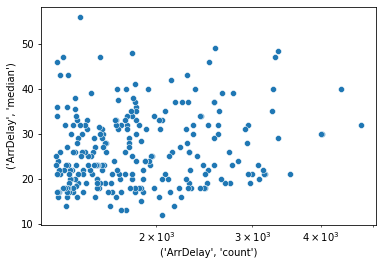

In [126]:
# NºVuelos anuales de la Ruta vs retraso mediano.
sns.scatterplot(data=rutas.head(250),y=('ArrDelay','median'),x=('ArrDelay','count'))
plt.xscale('log')
plt.show()


En este caso parece que se aprecia una leve tendencia a que rutas con mayor número de vuelos tienden a tener mayores retrasos.

## 3.5. Causas de los retrasos.

Para estimar la mediana del retraso según la causa podría caer en la tentación de agrupar usando la función aggregate.

In [127]:
df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].agg(('median'))

CarrierDelay         2.0
WeatherDelay         0.0
NASDelay             2.0
SecurityDelay        0.0
LateAircraftDelay    8.0
dtype: float64

Pero en este caso es más significativo que tenga en cuenta solo aquellos casos que se puedan imputar a cada causa, es decir que deberíamos filtrar y solo hallar el promedio para los casos que sean mayores que cero. 

In [128]:
causa_retraso=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
for var in causa_retraso:
    print('\n En un ',round(df[df[var]>0][var].count()/df[var].count()*100,1),'% de las ocasiones se imputa un retraso a ', var, 'y el valor de la mediana es: ',round(df[df[var]>0][var].median(),1), ' minutos')


 En un  52.6 % de las ocasiones se imputa un retraso a  CarrierDelay y el valor de la mediana es:  20.0  minutos

 En un  7.9 % de las ocasiones se imputa un retraso a  WeatherDelay y el valor de la mediana es:  25.0  minutos

 En un  52.8 % de las ocasiones se imputa un retraso a  NASDelay y el valor de la mediana es:  13.0  minutos

 En un  0.5 % de las ocasiones se imputa un retraso a  SecurityDelay y el valor de la mediana es:  13.0  minutos

 En un  55.4 % de las ocasiones se imputa un retraso a  LateAircraftDelay y el valor de la mediana es:  29.0  minutos


## 3.6. Guardar tablas en excell.

Quiero guardar en un excell las siguientes tablas, TF_DayOfYear (vuelos totales por día del año y retraso medio), delay_yoM (retraso medio por año de fabricación) y daley_carrier (retraso medio por compañía). Cada una de ellas en una hoja diferente.

In [129]:
with pd.ExcelWriter('resumen.xlsx') as writer:  
    TF_DayOfYear.to_excel(writer, sheet_name='Delay_DayOfYear')
    delay_carrier.to_excel(writer, sheet_name='Delay_Carriers')
    delay_yoM.to_excel(writer, sheet_name='Delay_plane')

# 4. Conclusiones.


En este notebook, he trabajado principalmente diferentes funcionalidades de la librería de python Pandas para tratamiento de datos. A lo largo del ejercicio he cargado diferentes archivos en formato CSV y he limpiado y preprocesado los datos. 

A continuación he trabajado con diferentes opciones de unir los dataframes para extraer datos de otras tablas.

Por último he utilizado las funcionalidades que proporciona Pandas para agrupar los datos en funciones de diferentes variables para intentar extraer información.

En el siguiente ejercicio añadiré o mejoraré los gráficos que acompañam al dataframe.

Como principales obtenidos del análisis del dataset tenemos los siguientes:

- Extiste una relación entre el número de vuelos y la fecha.
- En el global se oberva tendencia de que a mayor número de vuelos mayor retrasos.
- Los días festivos (4/7 o 25/12)se observan menos tráfico y menos proporción de retrasos.
- El restraso a la salida está linealmente relacionado con el retraso a la llegada.
- Aviones más antiguos tienden a tener mayores retrasos.
- Los retrasos más comunes se deben a la compañía, al vuelo anterior o la NAS.
- Es difícil observar un patron claro entre aeropuertos, tráfico aéreo y retraso, (probablemente se deberían de analizar otras variables y tener más información sobre la casuística de aeropuertos más relevantes) pero parece que se podría ver una curva en forma de U, es decir conforme crece el volumen de vuelos de un aeropuerto se observa menor retraso hasta que se llega a un mínimo y entonces los retrasos empiezan a crecer de nuevo con el número de vuelos. 